### Dataset

On a windows machine, you can download the file using the following command \
curl -L -o jamb_exam_results.csv https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('jamb_exam_results.csv')

In [3]:
df.columns

Index(['JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'School_Type',
       'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials',
       'Parent_Involvement', 'IT_Knowledge', 'Student_ID', 'Age', 'Gender',
       'Socioeconomic_Status', 'Parent_Education_Level',
       'Assignments_Completed'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'student_id', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [5]:
df.head().T

,0,1,2,3,4
jamb_score,192,207,182,210,199
study_hours_per_week,22,14,29,29,12
attendance_rate,78,88,87,99,98
teacher_quality,4,4,2,2,3
distance_to_school,12.4,2.7,9.6,2.6,8.8
school_type,Public,Public,Public,Public,Public
school_location,Urban,Rural,Rural,Urban,Urban
extra_tutorials,Yes,No,Yes,No,No
access_to_learning_materials,Yes,Yes,Yes,Yes,Yes
parent_involvement,High,High,High,Medium,Medium


### Data Preparation

Preparation:

Remove the student_id column.\
Fill missing values with zeros.\
Do train/validation/test split with 60%/20%/20% distribution.\
Use the train_test_split function and set the random_state parameter to 1.\
Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [6]:
# Remove student_id column
df = df.drop(columns=['student_id'])

In [7]:
# Check for missing values
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [8]:
# Fill missing values with 0
df = df.fillna(0)

In [9]:
df.dtypes

jamb_score                        int64
study_hours_per_week              int64
attendance_rate                   int64
teacher_quality                   int64
distance_to_school              float64
school_type                      object
school_location                  object
extra_tutorials                  object
access_to_learning_materials     object
parent_involvement               object
it_knowledge                     object
age                               int64
gender                           object
socioeconomic_status             object
parent_education_level           object
assignments_completed             int64
dtype: object

In [10]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [11]:
# Split the data into train, validation and test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
# Reset the index of the dataframes after splitting the data 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
# Create the target for train, validation and test sets
y_train = (df_train.jamb_score).astype('int').values
y_val = (df_val.jamb_score).astype('int').values
y_test = (df_test.jamb_score ).astype('int').values

In [14]:
# Remove the target column from the train, validation and test sets 
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [15]:
# Convert the dataframes to dictionaries and use the DictVectorizer to convert the dictionaries to a matrix 
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
X_test = dv.transform(df_test.to_dict(orient='records'))

### Question 1 

Let's train a decision tree regressor to predict the jamb_score variable.\
Train a model with max_depth=1.\
Which feature is used for splitting the data?

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [17]:
# Train a decision tree classifier with a maximum depth of 1 
dt = DecisionTreeRegressor(max_depth=1, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [18]:
# Getting the feature importances of the decision tree 
feature_importances = dt.tree_.feature
split_feature_index = dt.tree_.feature[0]  # Index of the first split feature

In [19]:
dv.feature_names_[split_feature_index]

'study_hours_per_week'

### Question 2

Train a random forest regressor with these parameters:

n_estimators=10\
random_state=1\
n_jobs=-1 (optional - to make training faster)\
What's the RMSE of this model on the validation data

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [21]:
# Train a random forest regressor with 10 trees 
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X=X_train, y=y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [22]:
y_pred = rf.predict(X_val)

In [23]:
root_mean_squared_error(y_val, y_pred) # RMSE

42.13724207871227

### Question 3

Now let's experiment with the n_estimators parameter:

Try different values of this parameter from 10 to 200 with step 10.\
Set random_state to 1.\
Evaluate the model on the validation dataset.\
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.\

In [24]:
rmse_values = []

for n in range(10, 201, 10):
    # Train a RandomForestRegressor with the current n_estimators value
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = rf.predict(X_val)
    
    # Calculate RMSE and store it
    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_values.append((n, rmse))

# Print the RMSE for each n_estimators value
for n, rmse in rmse_values:
    print(f"n_estimators={n}, RMSE={rmse:.3f}")


n_estimators=10, RMSE=42.137
n_estimators=20, RMSE=41.461
n_estimators=30, RMSE=41.106
n_estimators=40, RMSE=40.917
n_estimators=50, RMSE=40.852
n_estimators=60, RMSE=40.784
n_estimators=70, RMSE=40.677
n_estimators=80, RMSE=40.539
n_estimators=90, RMSE=40.504
n_estimators=100, RMSE=40.517
n_estimators=110, RMSE=40.593
n_estimators=120, RMSE=40.625
n_estimators=130, RMSE=40.651
n_estimators=140, RMSE=40.595
n_estimators=150, RMSE=40.597
n_estimators=160, RMSE=40.604
n_estimators=170, RMSE=40.628
n_estimators=180, RMSE=40.641
n_estimators=190, RMSE=40.631
n_estimators=200, RMSE=40.601


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


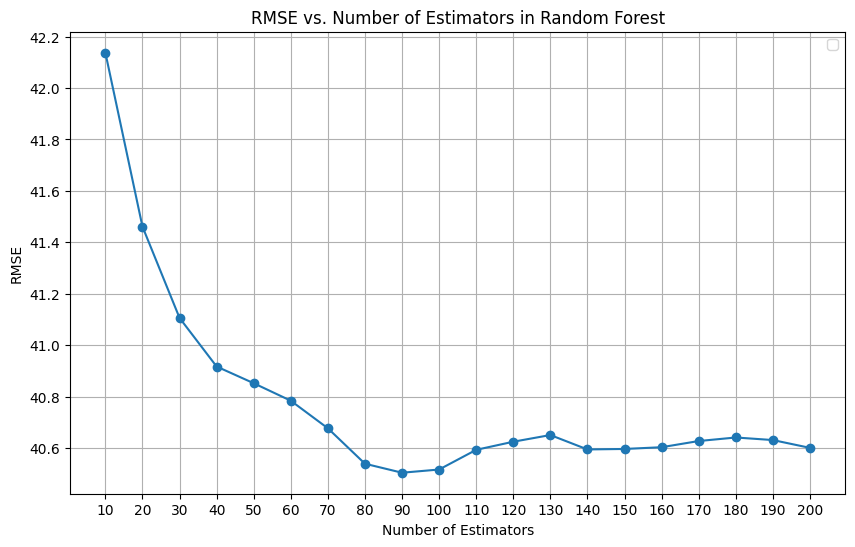

In [25]:
import matplotlib.pyplot as plt

# Extract n_estimators and corresponding RMSE values
n_estimators_list = [n for n, _ in rmse_values]
rmse_list = [rmse for _, rmse in rmse_values]

# Plotting the RMSE against n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, rmse_list, marker='o')
plt.title('RMSE vs. Number of Estimators in Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.xticks(n_estimators_list)  # Set x-ticks to be the n_estimators values
plt.grid()
plt.legend()
plt.show()


We can see that the RMSE doesn't improve much after n_estimators reaches 80.

### Question 4

Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]\
For each of these values,try different values of n_estimators from 10 till 200 (with step 10)\
calculate the mean RMSE\
Fix the random seed: random_state=1\
What's the best max_depth, using the mean RMSE?

In [26]:
mean_rmse_results = {}

for max_depth in [10, 15, 20, 25]:
    rmse_values = []
    for n_estimators in range(10, 201, 10):
        # Train a RandomForestRegressor with the current n_estimators value
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = rf.predict(X_val)

        # Calculate RMSE and store it
        rmse = root_mean_squared_error(y_val, y_pred)
        rmse_values.append(rmse)
        
    mean_rmse = np.mean(rmse_values)
    mean_rmse_results[max_depth] = mean_rmse

In [32]:
mean_rmse_results

{10: 40.39249798892396,
 15: 40.73528172486332,
 20: 40.739734321829275,
 25: 40.78786565962805}

In [27]:
# Print the mean RMSE for each max_depth
for depth, mean_rmse in mean_rmse_results.items():
    print(f"max_depth={depth}, Mean RMSE={mean_rmse:.3f}")

max_depth=10, Mean RMSE=40.392
max_depth=15, Mean RMSE=40.735
max_depth=20, Mean RMSE=40.740
max_depth=25, Mean RMSE=40.788


In [28]:
# Find the best max_depth
best_max_depth = min(mean_rmse_results, key=mean_rmse_results.get)
best_mean_rmse = mean_rmse_results[best_max_depth]
print(f"\nBest max_depth is {best_max_depth} with Mean RMSE={best_mean_rmse:.3f}")


Best max_depth is 10 with Mean RMSE=40.392


### Question 5

We can extract feature importance information from tree-based models.At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
n_estimators=10,\
max_depth=20,\
random_state=1,\
n_jobs=-1 (optional)\
Get the feature importance information from this model.What's the most important feature

In [37]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

# Get the feature importances of the random forest
feature_importances = rf.feature_importances_

# Create a mapping of feature names to feature importances
feature_importances_dict = dict(zip(dv.feature_names_, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_feature_importances[:5])

[('study_hours_per_week', 0.2483536119939654), ('attendance_rate', 0.14972902978467467), ('distance_to_school', 0.13648580486323686), ('teacher_quality', 0.08268222263880151), ('age', 0.06931145469695396)]


We can see that the most important feature is study_hours_per_week

### Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:\
Create DMatrix for train and validation.  
Create a watchlist\
Train a model with these parameters for 100 rounds:

xgb_params = {\
    'eta': 0.3,\
    'max_depth': 6,\
    'min_child_weight': 1,   
    'objective': 'reg:squarederror',\
    'nthread': 8,   
    'seed': 1,\
    'verbosity': 1,\
}

In [38]:
import xgboost as xgb

In [39]:
# Create DMatrix for training and validation datasets
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [40]:
# Create a watchlist to monitor the training and validation performance
watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [41]:
# Define XGBoost parameters
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [46]:
# Training the XGBoost model for 100 rounds with eta of 0.3 
xgb_params['eta'] = 0.3

# Train the model
xgb_model_0_3 = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=100, verbose_eval= 5 , evals=watchlist)

# Predict on the validation set
y_pred_0_3 = xgb_model_0_3.predict(dval)

# Calculate RMSE
rmse_0_3 = root_mean_squared_error(y_val, y_pred_0_3)
print(f"RMSE with eta = 0.3: {rmse_0_3:.4f}")


[0]	train-rmse:42.69552	eval-rmse:44.86028
[5]	train-rmse:34.43646	eval-rmse:40.87186
[10]	train-rmse:31.55119	eval-rmse:40.83684
[15]	train-rmse:29.08791	eval-rmse:41.37832
[20]	train-rmse:27.24424	eval-rmse:41.80313
[25]	train-rmse:25.52682	eval-rmse:42.16423
[30]	train-rmse:24.12906	eval-rmse:42.28557
[35]	train-rmse:22.40407	eval-rmse:42.54946
[40]	train-rmse:21.45994	eval-rmse:42.77917
[45]	train-rmse:20.39910	eval-rmse:42.92252
[50]	train-rmse:19.30407	eval-rmse:43.11630
[55]	train-rmse:18.42737	eval-rmse:43.38441
[60]	train-rmse:17.42414	eval-rmse:43.40830
[65]	train-rmse:16.59974	eval-rmse:43.52522
[70]	train-rmse:15.74173	eval-rmse:43.77894
[75]	train-rmse:14.87321	eval-rmse:43.91229
[80]	train-rmse:14.28350	eval-rmse:44.08528
[85]	train-rmse:13.64009	eval-rmse:44.22602
[90]	train-rmse:12.90222	eval-rmse:44.30365
[95]	train-rmse:12.05464	eval-rmse:44.31210
[99]	train-rmse:11.56417	eval-rmse:44.43210
RMSE with eta = 0.3: 44.4321


In [47]:
# Update the eta parameter
xgb_params['eta'] = 0.1

# Train the model
xgb_model_0_1 = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=100,verbose_eval= 5, evals=watchlist)

# Predict on the validation set
y_pred_0_1 = xgb_model_0_1.predict(dval)

# Calculate RMSE
rmse_0_1 = root_mean_squared_error(y_val, y_pred_0_1)
print(f"RMSE with eta = 0.1: {rmse_0_1:.4f}")


[0]	train-rmse:45.50072	eval-rmse:46.99373
[5]	train-rmse:40.15460	eval-rmse:43.05644
[10]	train-rmse:37.11353	eval-rmse:41.55631
[15]	train-rmse:35.07766	eval-rmse:40.70892
[20]	train-rmse:33.57997	eval-rmse:40.37859
[25]	train-rmse:32.50134	eval-rmse:40.21661
[30]	train-rmse:31.47315	eval-rmse:40.20963
[35]	train-rmse:30.68870	eval-rmse:40.19360
[40]	train-rmse:29.89807	eval-rmse:40.15747
[45]	train-rmse:29.33094	eval-rmse:40.21096
[50]	train-rmse:28.58793	eval-rmse:40.28533
[55]	train-rmse:27.95277	eval-rmse:40.44296
[60]	train-rmse:27.26360	eval-rmse:40.55054
[65]	train-rmse:26.56706	eval-rmse:40.66625
[70]	train-rmse:26.05959	eval-rmse:40.73555
[75]	train-rmse:25.55747	eval-rmse:40.76267
[80]	train-rmse:25.13835	eval-rmse:40.82813
[85]	train-rmse:24.64140	eval-rmse:40.87915
[90]	train-rmse:23.93958	eval-rmse:40.89645
[95]	train-rmse:23.39469	eval-rmse:40.95651
[99]	train-rmse:23.14487	eval-rmse:41.04335
RMSE with eta = 0.1: 41.0434


In [49]:
# Checking which eta value gives the best RMSE 
best_eta = 0.3 if rmse_0_3 < rmse_0_1 else 0.1
best_eta

0.1